### Data Cleaning and Understanding the Data

importing libraries

In [10]:
import pandas as pd
import numpy as np

loading in data

In [59]:
data = pd.read_csv("water_pollution_disease.csv")
data

,Country,Region,Year,Water Source Type,Contaminant Level (ppm),pH Level,Turbidity (NTU),Dissolved Oxygen (mg/L),Nitrate Level (mg/L),Lead Concentration (µg/L),...,"Cholera Cases per 100,000 people","Typhoid Cases per 100,000 people","Infant Mortality Rate (per 1,000 live births)",GDP per Capita (USD),Healthcare Access Index (0-100),Urbanization Rate (%),Sanitation Coverage (% of Population),Rainfall (mm per year),Temperature (°C),Population Density (people per km²)
0,Mexico,North,2015,Lake,6.06,7.12,3.93,4.28,8.28,7.89,...,33,44,76.16,57057,96.92,84.61,63.23,2800,4.94,593
1,Brazil,West,2017,Well,5.24,7.84,4.79,3.86,15.74,14.68,...,27,8,77.30,17220,84.73,73.37,29.12,1572,16.93,234
2,Indonesia,Central,2022,Pond,0.24,6.43,0.79,3.42,36.67,9.96,...,39,50,48.45,86022,58.37,72.86,93.56,2074,21.73,57
3,Nigeria,East,2016,Well,7.91,6.71,1.96,3.12,36.92,6.77,...,33,13,95.66,31166,39.07,71.07,94.25,937,3.79,555
4,Mexico,South,2005,Well,0.12,8.16,4.22,9.15,49.35,12.51,...,31,68,58.78,25661,23.03,55.55,69.23,2295,31.44,414
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,Nigeria,East,2002,Tap,2.82,7.40,4.43,9.69,37.58,18.52,...,28,56,73.77,21255,75.34,15.22,53.06,264,31.64,882
2996,Nigeria,North,2019,Lake,8.13,8.33,4.77,7.62,38.05,16.98,...,34,34,71.11,79148,6.91,22.89,78.45,2699,33.21,67
2997,USA,South,2009,Pond,1.18,6.76,4.75,7.07,36.13,7.99,...,49,9,96.63,48569,86.17,85.89,47.38,1052,11.57,643
2998,Pakistan,South,2009,Pond,7.56,6.12,3.49,8.93,25.30,19.86,...,33,90,20.71,49099,20.50,20.78,23.34,369,14.69,643


Finding all unique values in each column where there are less than 30 unique values. Really want to see all of the variables that we could make categorical. We see that there is a nan value in **Water Treatment Method**. So we need yo fix that. I am going to make that nan value into a string that says 'None'. This is assumming that the nan value represents no filtration method used or none that was recorded.

In [16]:
for column in data.columns:
    unique_values = data[column].unique()
    if len(unique_values) < 30:
        print(f"{column} ({len(unique_values)} unique values): {unique_values}")


Country (10 unique values): ['Mexico' 'Brazil' 'Indonesia' 'Nigeria' 'Ethiopia' 'China' 'Bangladesh'
 'India' 'USA' 'Pakistan']
Region (5 unique values): ['North' 'West' 'Central' 'East' 'South']
Year (25 unique values): [2015 2017 2022 2016 2005 2013 2024 2014 2023 2021 2002 2018 2011 2001
 2000 2019 2020 2004 2007 2003 2009 2010 2006 2012 2008]
Water Source Type (6 unique values): ['Lake' 'Well' 'Pond' 'Tap' 'River' 'Spring']
Water Treatment Method (4 unique values): ['Filtration' 'Boiling' nan 'Chlorination']


In [18]:
data.isna().any()

Country                                          False
Region                                           False
Year                                             False
Water Source Type                                False
Contaminant Level (ppm)                          False
pH Level                                         False
Turbidity (NTU)                                  False
Dissolved Oxygen (mg/L)                          False
Nitrate Level (mg/L)                             False
Lead Concentration (µg/L)                        False
Bacteria Count (CFU/mL)                          False
Water Treatment Method                            True
Access to Clean Water (% of Population)          False
Diarrheal Cases per 100,000 people               False
Cholera Cases per 100,000 people                 False
Typhoid Cases per 100,000 people                 False
Infant Mortality Rate (per 1,000 live births)    False
GDP per Capita (USD)                             False
Healthcare

Here I am filling in the nan values with 'None'.

In [21]:
data['Water Treatment Method'] = data['Water Treatment Method'].fillna('None')
data.isna().any()

Country                                          False
Region                                           False
Year                                             False
Water Source Type                                False
Contaminant Level (ppm)                          False
pH Level                                         False
Turbidity (NTU)                                  False
Dissolved Oxygen (mg/L)                          False
Nitrate Level (mg/L)                             False
Lead Concentration (µg/L)                        False
Bacteria Count (CFU/mL)                          False
Water Treatment Method                           False
Access to Clean Water (% of Population)          False
Diarrheal Cases per 100,000 people               False
Cholera Cases per 100,000 people                 False
Typhoid Cases per 100,000 people                 False
Infant Mortality Rate (per 1,000 live births)    False
GDP per Capita (USD)                             False
Healthcare

In [44]:
data.dtypes

Country                                           object
Region                                            object
Year                                               int64
Water Source Type                                 object
Contaminant Level (ppm)                          float64
pH Level                                         float64
Turbidity (NTU)                                  float64
Dissolved Oxygen (mg/L)                          float64
Nitrate Level (mg/L)                             float64
Lead Concentration (µg/L)                        float64
Bacteria Count (CFU/mL)                            int64
Water Treatment Method                            object
Access to Clean Water (% of Population)          float64
Diarrheal Cases per 100,000 people                 int64
Cholera Cases per 100,000 people                   int64
Typhoid Cases per 100,000 people                   int64
Infant Mortality Rate (per 1,000 live births)    float64
GDP per Capita (USD)           

The boxplots show us that there aren't any outliers in the data and they appear to have normal distributions.

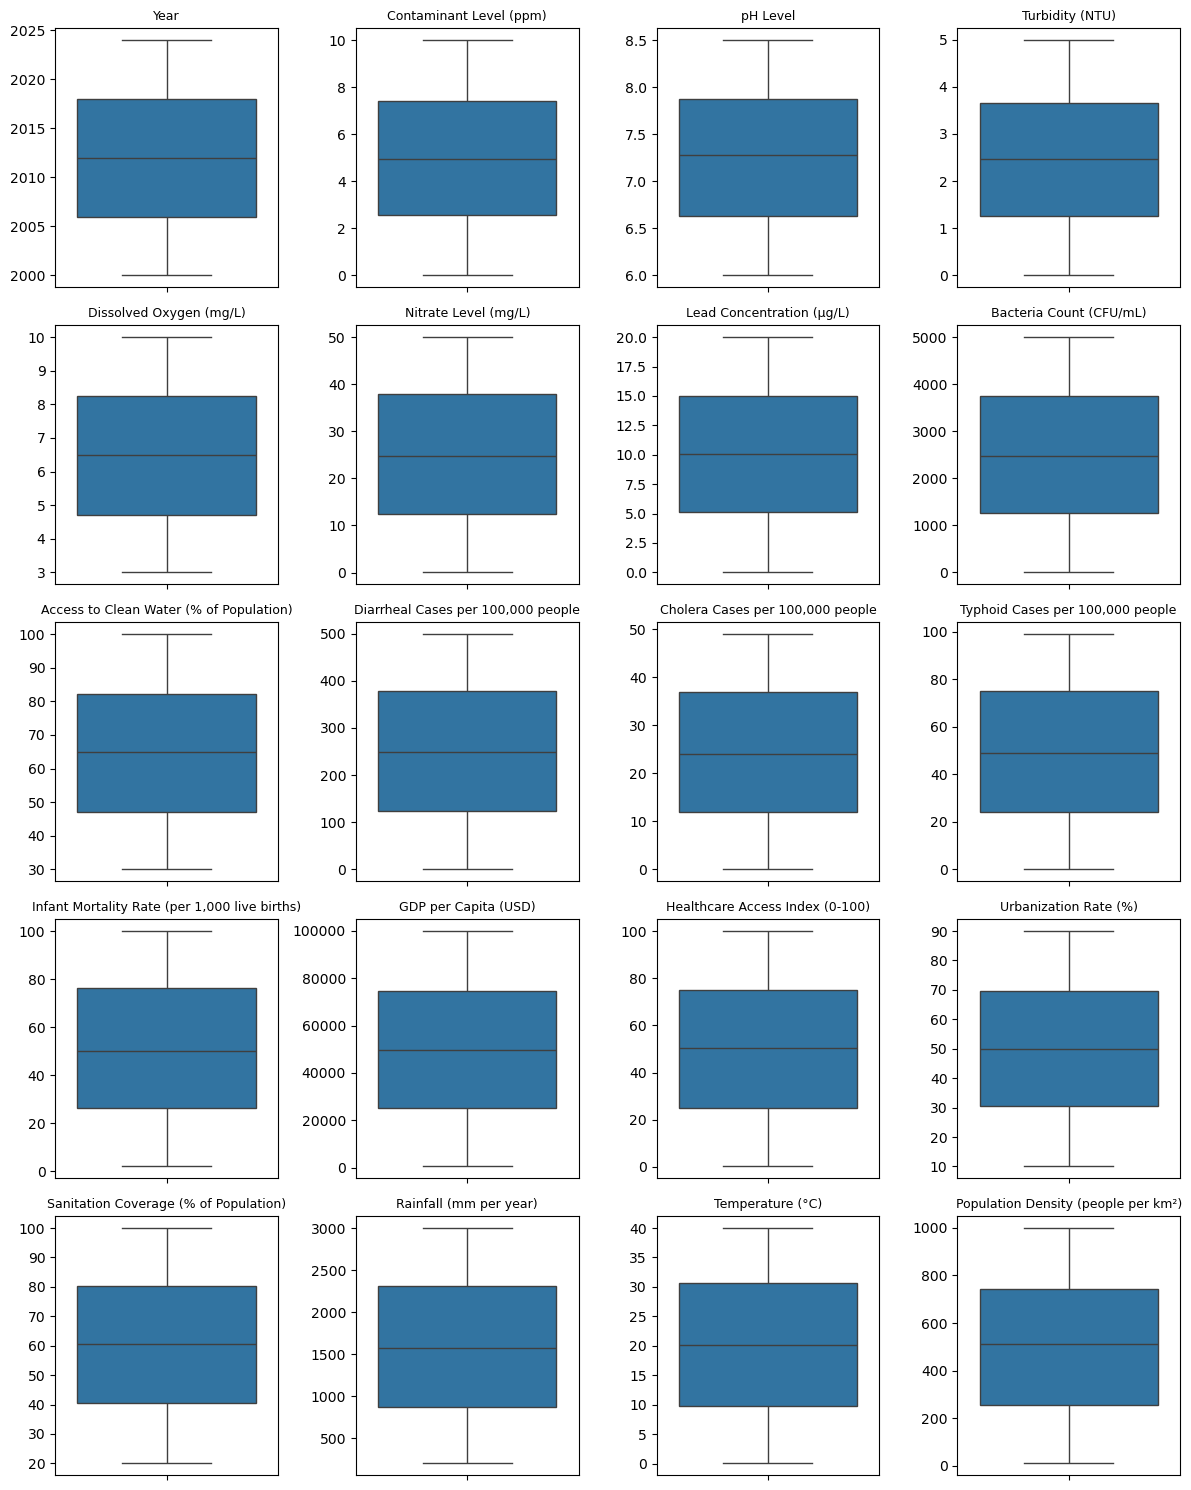

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt
import math

numCols = data.select_dtypes(include = 'number').columns
numeric = data[numCols].apply(pd.to_numeric, errors ='coerce')

colsPerRow = 4
numPlots = len(numCols)
numRows = math.ceil(len(numCols) / colsPerRow)

fig, axes = plt.subplots(numRows, colsPerRow, figsize = (colsPerRow * 3, numRows * 3))
axes = axes.flatten()

for i,col in enumerate(numCols):
    sns.boxplot(y=numeric[col], ax = axes[i])
    axes[i].set_title(col, fontsize=9)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### Data Transformation

In [70]:
catCols = ['Country', 'Region', 'Water Source Type', 'Water Treatment Method']
catMap = {}
dummyData = data

for col in catCols:
    dummyData[col] = dummyData[col].astype('category')
    mapping = dict(enumerate(dummyData[col].cat.categories))
    catMap[col] = mapping
    dummyData[col] = dummyData[col].cat.codes

for col, mapping in catMap.items():
    print(f"\n{col} Mapping:")
    for code, label in mapping.items():
        print(f"  {code}: {label}")

dummyData.head()


Country Mapping:
  0: 0
  1: 1
  2: 2
  3: 3
  4: 4
  5: 5
  6: 6
  7: 7
  8: 8
  9: 9

Region Mapping:
  0: 0
  1: 1
  2: 2
  3: 3
  4: 4

Water Source Type Mapping:
  0: 0
  1: 1
  2: 2
  3: 3
  4: 4
  5: 5

Water Treatment Method Mapping:
  0: 0
  1: 1
  2: 2
  3: 3


,Country,Region,Year,Water Source Type,Contaminant Level (ppm),pH Level,Turbidity (NTU),Dissolved Oxygen (mg/L),Nitrate Level (mg/L),Lead Concentration (µg/L),...,"Cholera Cases per 100,000 people","Typhoid Cases per 100,000 people","Infant Mortality Rate (per 1,000 live births)",GDP per Capita (USD),Healthcare Access Index (0-100),Urbanization Rate (%),Sanitation Coverage (% of Population),Rainfall (mm per year),Temperature (°C),Population Density (people per km²)
0,6,2,2015,0,6.06,7.12,3.93,4.28,8.28,7.89,...,33,44,76.16,57057,96.92,84.61,63.23,2800,4.94,593
1,1,4,2017,5,5.24,7.84,4.79,3.86,15.74,14.68,...,27,8,77.30,17220,84.73,73.37,29.12,1572,16.93,234
2,5,0,2022,1,0.24,6.43,0.79,3.42,36.67,9.96,...,39,50,48.45,86022,58.37,72.86,93.56,2074,21.73,57
3,7,1,2016,5,7.91,6.71,1.96,3.12,36.92,6.77,...,33,13,95.66,31166,39.07,71.07,94.25,937,3.79,555
4,6,3,2005,5,0.12,8.16,4.22,9.15,49.35,12.51,...,31,68,58.78,25661,23.03,55.55,69.23,2295,31.44,414


Descriptive Stats

In [75]:
summary = dummyData.describe(include = 'all')
print(summary.round(2))

       Country   Region     Year  Water Source Type  Contaminant Level (ppm)  \
count  3000.00  3000.00  3000.00            3000.00                  3000.00   
mean      4.55     1.97  2012.01               2.54                     4.95   
std       2.88     1.42     7.23               1.69                     2.86   
min       0.00     0.00  2000.00               0.00                     0.00   
25%       2.00     1.00  2006.00               1.00                     2.56   
50%       5.00     2.00  2012.00               3.00                     4.95   
75%       7.00     3.00  2018.00               4.00                     7.40   
max       9.00     4.00  2024.00               5.00                    10.00   

       pH Level  Turbidity (NTU)  Dissolved Oxygen (mg/L)  \
count   3000.00          3000.00                  3000.00   
mean       7.26             2.48                     6.49   
std        0.72             1.42                     2.03   
min        6.00             0.00   

Heatmap

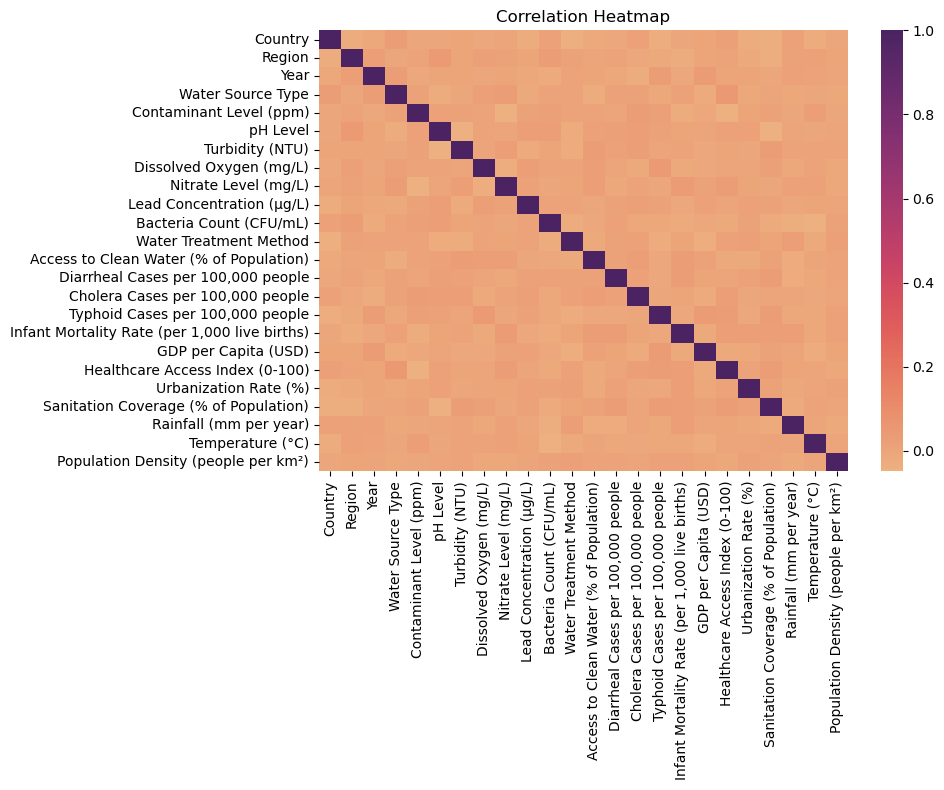

In [96]:
corrMatrix = dummyData.corr()

plt.figure(figsize = (10,8))
sns.heatmap(corrMatrix, cmap = 'flare')
plt.title("Correlation Heatmap")
plt.tight_layout()